<a href="https://colab.research.google.com/github/Chandni0369/ML-LAB-D11ADA-57/blob/main/exp%206/ML_exp6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

import io
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import joblib

Saving gender_submission.csv to gender_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [2]:
train = pd.read_csv(io.BytesIO(uploaded['train.csv']))
test = pd.read_csv(io.BytesIO(uploaded['test.csv']))
print('Loaded:', train.shape, test.shape)

Loaded: (891, 12) (418, 11)


In [3]:
def preprocess(df):
    df = df.copy()
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    df['Title'] = df['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')
    df['Title'] = df['Title'].replace('Mlle','Miss')
    df['Title'] = df['Title'].replace('Ms','Miss')
    df['Title'] = df['Title'].replace('Mme','Mrs')
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
    df['Age'] = df['Age'].fillna(df['Age'].median())
    df['Fare'] = df['Fare'].fillna(df['Fare'].median())
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
    df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
    df = pd.get_dummies(df, columns=['Embarked','Title'], drop_first=True)
    df = df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1, errors='ignore')
    return df

test_ids = test['PassengerId'].copy()
train_p = preprocess(train)
test_p = preprocess(test)

<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-4245351847.py:3: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [4]:
X = train_p.drop('Survived', axis=1)
y = train_p['Survived']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
test_scaled = scaler.transform(test_p)

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [5]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_val)
acc = accuracy_score(y_val, y_pred)
print(f"SVM Validation Accuracy: {acc:.4f}")
print(classification_report(y_val, y_pred))

cv_scores = cross_val_score(svm_model, X_scaled, y, cv=5, scoring='accuracy')
print(f"SVM Cross-Validation Mean: {cv_scores.mean():.4f}, Std: {cv_scores.std():.4f}")


SVM Validation Accuracy: 0.8380
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       110
           1       0.82      0.74      0.78        69

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179

SVM Cross-Validation Mean: 0.8260, Std: 0.0232


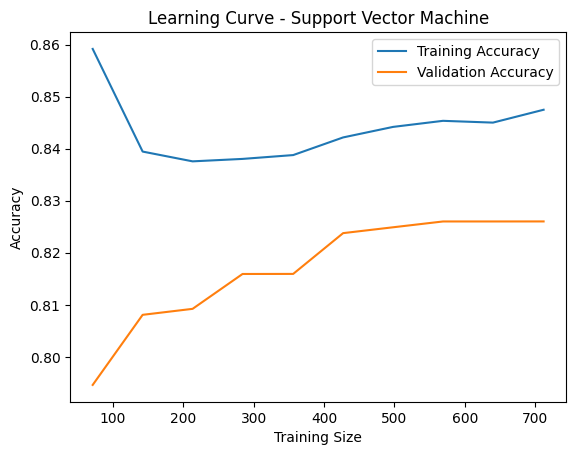

In [6]:
train_sizes, train_scores, val_scores = learning_curve(
    svm_model, X_scaled, y, cv=5, train_sizes=np.linspace(0.1,1.0,10), scoring='accuracy', shuffle=True, random_state=42
)
train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label='Training Accuracy')
plt.plot(train_sizes, val_mean, label='Validation Accuracy')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve - Support Vector Machine')
plt.legend()
plt.show()
